<a href="https://colab.research.google.com/github/subhan215/deep-learning-assignment/blob/main/Car_Price_Prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

Problem Statement:: A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

task::

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

WORKFLOW :: 1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it) 6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [2]:
import io 

In [3]:
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

In [4]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
data.isna().any().any()

False

# Converting string values into numerical values

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])

In [7]:
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [8]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

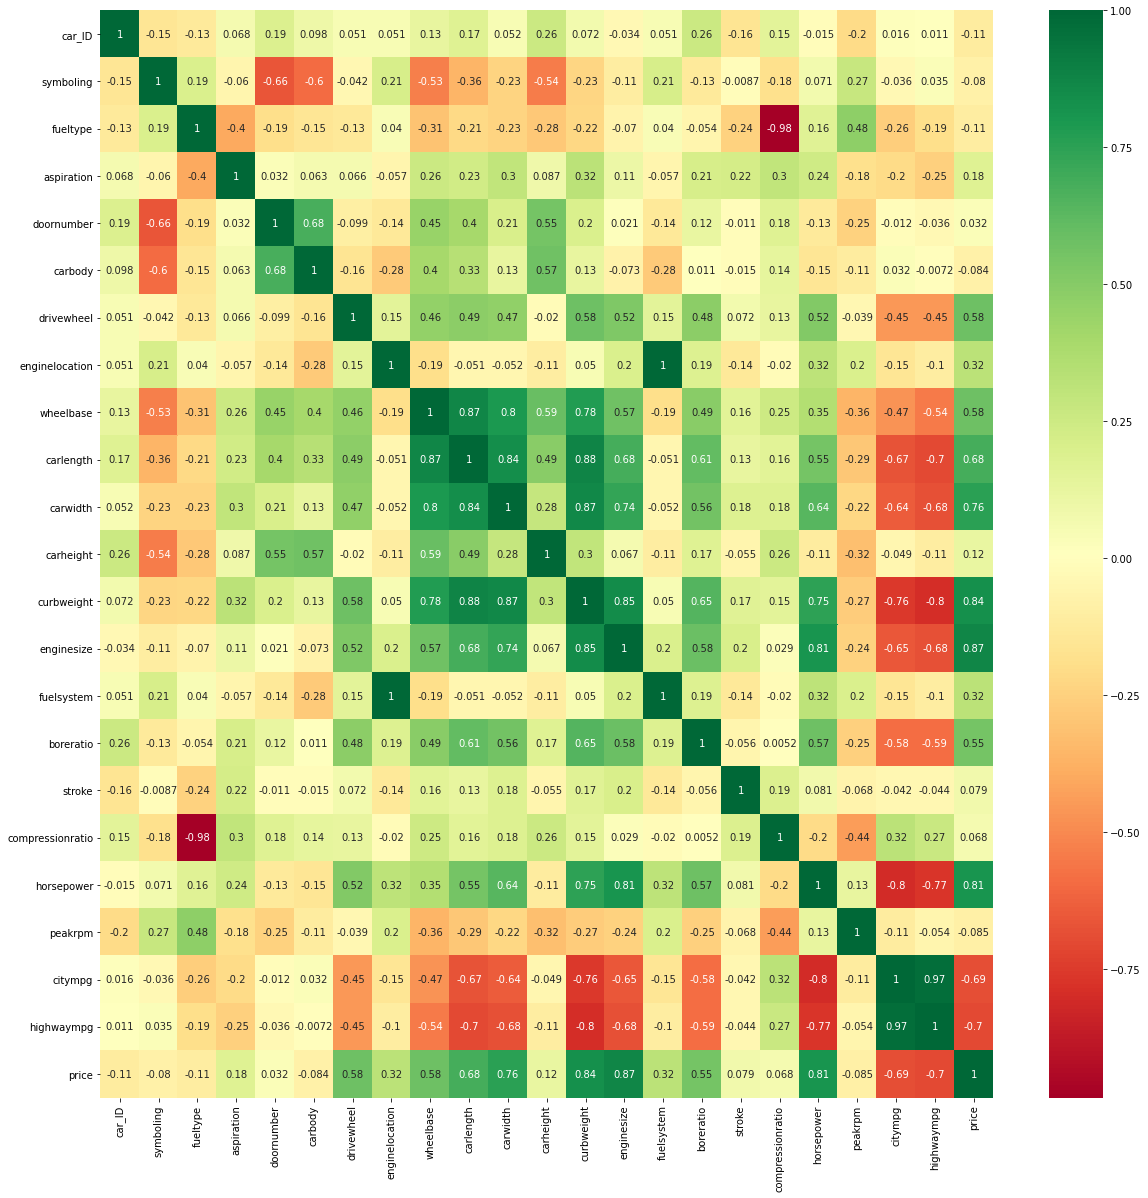

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
newdata = data[['horsepower', 'boreratio', 'enginesize' ,'curbweight','carwidth', 'carlength', 'wheelbase' ,'drivewheel',
                'price' ,'enginelocation']]

In [12]:
display(newdata.head())
newdata.shape

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


(205, 10)

In [13]:
labels = newdata.pop('price')

In [14]:
# Splitting data
from sklearn.model_selection import train_test_split
train, test , train_labels, test_labels= train_test_split(newdata, labels, test_size=0.30)

In [15]:
print(train.shape)
print(test.shape)

(143, 9)
(62, 9)


In [16]:
train_labels

38      9095.0
121     6692.0
31      6855.0
103    13499.0
34      7129.0
        ...   
98      8249.0
30      6479.0
176    10898.0
112    16900.0
199    18950.0
Name: price, Length: 143, dtype: float64

In [17]:
test_labels

177    11248.0
99      8949.0
48     35550.0
107    11900.0
172    17669.0
        ...   
77      6189.0
169     9989.0
95      7799.0
127    34028.0
19      6295.0
Name: price, Length: 62, dtype: float64

In [18]:
#Validatioin data split
vaildation_data = train[:28]
validation_labels = train_labels[:28]

train = train[28:]
train_labels = train_labels[28:]

In [19]:
from keras import layers 
from keras import models
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape =(train.shape[1],)))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [20]:
all_mae = []
model = build_model()
model.fit(train, train_labels, epochs=100, batch_size=1 , verbose=0)
  


In [21]:
val_mse, val_mae = model.evaluate(vaildation_data, validation_labels, verbose=0)
all_mae.append(val_mae)  

In [22]:
val_mae

3841.097412109375

In [23]:
mae, mse = model.evaluate(test, test_labels, verbose=0)
print(f'Testing set mean Abs error: {round(mae, 3)}')

Testing set mean Abs error: 34486828.0


In [24]:
mae

34486828.0

In [25]:
test_predictions = model.predict(test).flatten()

In [26]:
test_predictions

array([12229.276, 11634.374, 22121.463, 15132.627, 15407.214, 15672.592,
       16752.408, 12903.997, 19977.607, 13837.092, 16569.76 , 15544.395,
       13099.77 , 13714.713, 11466.62 , 10457.133, 15569.426,  9573.624,
       12600.044, 11979.224, 17699.312, 12304.869,  9146.923, 10906.156,
        9608.996, 15526.989, 12885.299, 15678.496,  9706.237, 12068.455,
        9409.232, 15153.855, 11767.044,  9231.177, 15278.407, 11953.784,
       11893.468,  9523.539, 19026.166, 11953.784,  9406.842, 15966.39 ,
       13321.252,  9523.539, 11566.609, 14960.853, 11635.142,  9257.449,
       19518.867,  9152.812, 12599.994, 12376.51 , 16230.412,  8992.943,
       10702.744, 15748.364, 15570.916,  9290.729, 13158.119,  9709.502,
       15678.496,  8941.281], dtype=float32)